# Predicting Taiwan Credit Card Default

## Introduction 






In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


dat = pd.read_csv("https://raw.githubusercontent.com/DerekMcFate/MachineLearningProject/master/default_cc_train.csv")

## Data Preprocessing

In [39]:
# Rename our label as "DEFAULT"
dat = dat.rename(index=str, columns={"default.payment.next.month": "DEFAULT"})

# Throw away education=0 and combine education=5,6 as both are 'unknown'
dat['EDUCATION'].replace(6, 5, inplace=True)
dat = dat[dat['EDUCATION'] != 0]

dat = dat[dat.MARRIAGE != 0]

dat['CULM'] = dat['PAY_AMT6'] * dat['PAY_6']

## Data Exploration

In this plot we show the density of Ages that are represented in the dataset. Most of the people are in their 20's and 30's.

C:\Users\cauly\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


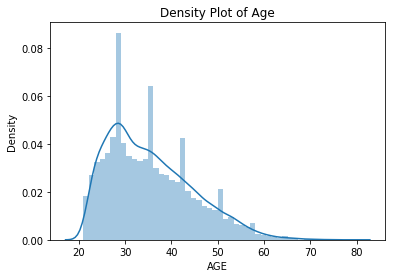

In [40]:
fig = sns.distplot(dat["AGE"])
plt.xlabel("AGE")
plt.ylabel("Density")
plt.title("Density Plot of Age") 
plt.show(fig)

Here are the percentage of each sex that defaults with 1 representing male and 2 representing female. The percentage of males that default are slightly more than the percentage females. This is with the data set being mostly female.

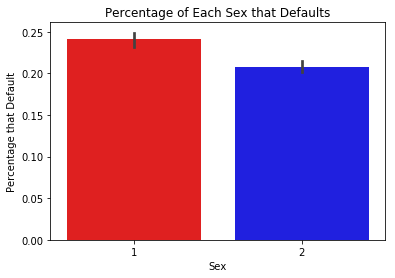

2    15072
1     9871
Name: SEX, dtype: int64

In [41]:
#men barely more likel to default
fig = sns.barplot(dat["SEX"],dat["DEFAULT"],palette=["red","blue"])
plt.xlabel("Sex")
plt.ylabel("Percentage that Default")
plt.title("Percentage of Each Sex that Defaults") 
plt.show(fig)
#more women
dat["SEX"].value_counts()


Here we show the percentage that default from each education level. The lower three levels are far more likely to default than the last two.

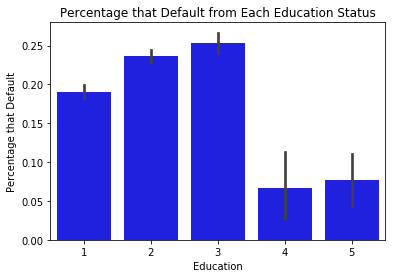

In [42]:
#more likely to default with 1-3 eduction level
fig = sns.barplot(dat["EDUCATION"],dat["DEFAULT"],palette=["blue"])
plt.xlabel("Education")
plt.ylabel("Percentage that Default")
plt.title("Percentage that Default from Each Education Status") 
plt.show(fig)

Looking at marriage status there doesn't seem to be to big of a difference between marrage status and the percentage that that group defaults.

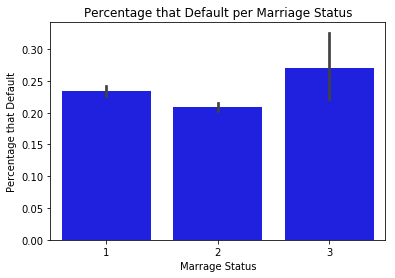

In [43]:
#looks like un married is less likely to default
fig = sns.barplot(dat["MARRIAGE"],dat["DEFAULT"],palette=["blue"])
plt.xlabel("Marrage Status")
plt.ylabel("Percentage that Default")
plt.title("Percentage that Default per Marriage Status") 
plt.show(fig)

Here are the percentage that each payment delay status will default for the months of may and september. A few key trends to note is that if the balance is paid off completely then the client is very unlikely to default while if there are one or more months of not paying they are more likely to default. Also it is interesting to note that if s client has not paid for eight months in may they 100% default while it is 50-50 chance of them defaulting in the most recent month(september) with eight month not paid.

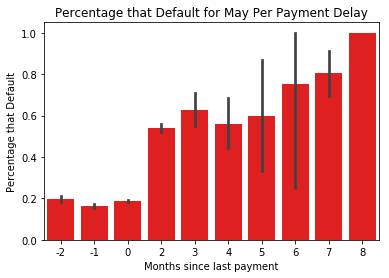

In [44]:
#if you're at a level 8 bad boi on these months you default 100%
fig = sns.barplot(dat["PAY_5"],dat["DEFAULT"],palette=["red"])
plt.xlabel("Months since last payment")
plt.ylabel("Percentage that Default")
plt.title("Percentage that Default for May Per Payment Delay") 
plt.show(fig)

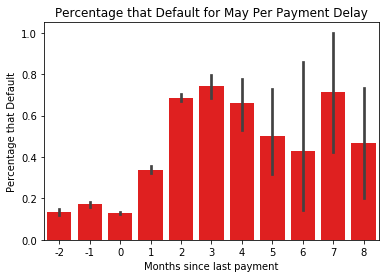

In [45]:
#if youre at 8 months no pay 50-50 chance to default
fig = sns.barplot(dat["PAY_0"],dat["DEFAULT"],palette=["red"])
plt.xlabel("Months since last payment")
plt.ylabel("Percentage that Default")
plt.title("Percentage that Default for May Per Payment Delay") 
plt.show(fig)

## Data Preprocessing 

## Machine Learning